This notebook shows why EIS instrumental width might depend on the wavelength. 
Link to [Figure C2](#figurec2). 

(The internal hyperlink only works on [nbviewer](https://nbviewer.org/github/yjzhu-solar/EIS_SUMER_PCH_Ti/blob/main/ipynb/paper/eis_dlamb_inst_lamb.ipynb). Do not click when viewing the notebook on GitHub.)

In [4]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rcParams
from matplotlib import patches
import scipy.io
import astropy.constants as const
import importlib
#from IPython.display import display, Math
from astropy.modeling import models, fitting, Fittable1DModel, Parameter
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import simps
import h5py
from scipy.optimize import curve_fit
from astropy.io import fits
import juanfit
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow

In [117]:
data_set_cor = scipy.io.readsav("../../save/linewidth_calibration_tilt_cor_l1_20070413_00323.sav",verbose=False)
window_start_index = data_set_cor["window_start_index"]
window_end_index = data_set_cor["window_end_index"]
wvl = data_set_cor["wvl"]
eis_img = np.mean(data_set_cor["new_data_offset"],axis=0)
eis_err = np.mean(data_set_cor["new_err_offset"],axis=0)
eis_img_aver = np.mean(eis_img[372:402,:],axis=0)
eis_err_aver = np.sqrt(np.sum(np.square(eis_err[372:402,:]),axis=0))/30.

In [118]:
FeXI_line_set_wvl = np.zeros(50)
FeXI_line_set_fwhm = np.zeros(50)
FeXI_line_set_fwhm_err = np.zeros(50)

<AxesSubplot:ylabel='Intensity'>

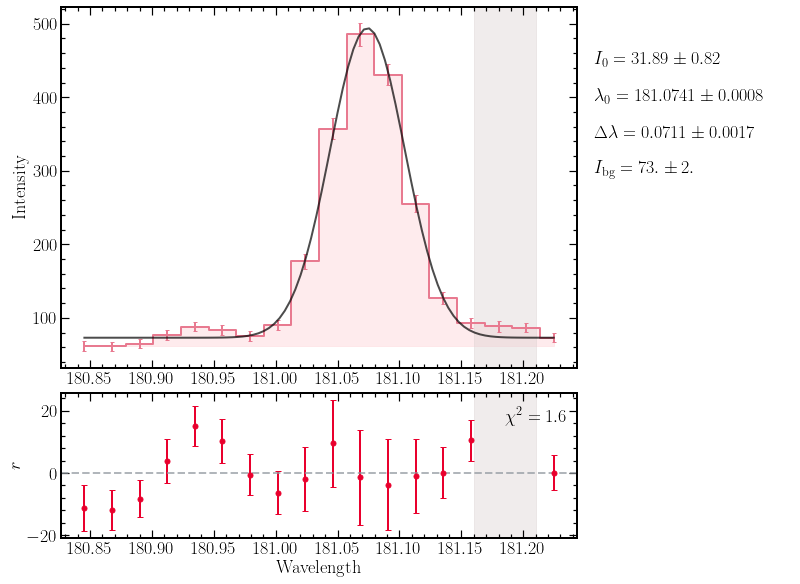

In [119]:
FeXI_181_slice = slice(652,670)
FeXI_181_model = SpectrumFitSingle(data=eis_img_aver[FeXI_181_slice],wvl=wvl[FeXI_181_slice],
                                err=eis_err_aver[FeXI_181_slice],line_number=1,
                                    line_wvl_init=[181.08],int_max_init=[600],mask=[[181.16,181.21]],
                                    fwhm_init=[0.07],same_width=True)
FeXI_181_model.run_lse()
FeXI_181_model.plot()

<AxesSubplot:ylabel='Intensity'>

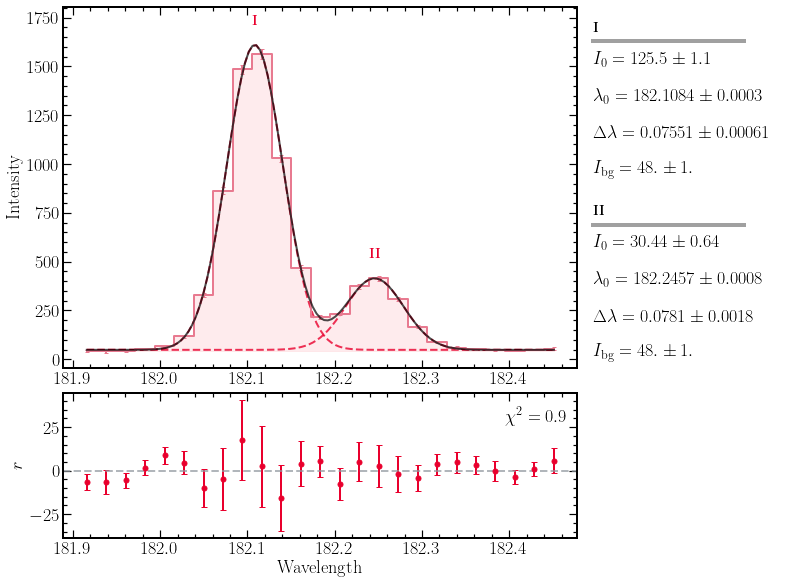

In [120]:
FeXI_182_slice = slice(700,725)
FeXI_182_model = SpectrumFitSingle(data=eis_img_aver[FeXI_182_slice],wvl=wvl[FeXI_182_slice],
                                err=eis_err_aver[FeXI_182_slice],line_number=2,
                                    line_wvl_init=[182.1,182.25],int_max_init=[2000,500],
                                    fwhm_init=[0.07,0.07],same_width=False)
FeXI_182_model.run_lse()
FeXI_182_model.plot()

<AxesSubplot:ylabel='Intensity'>

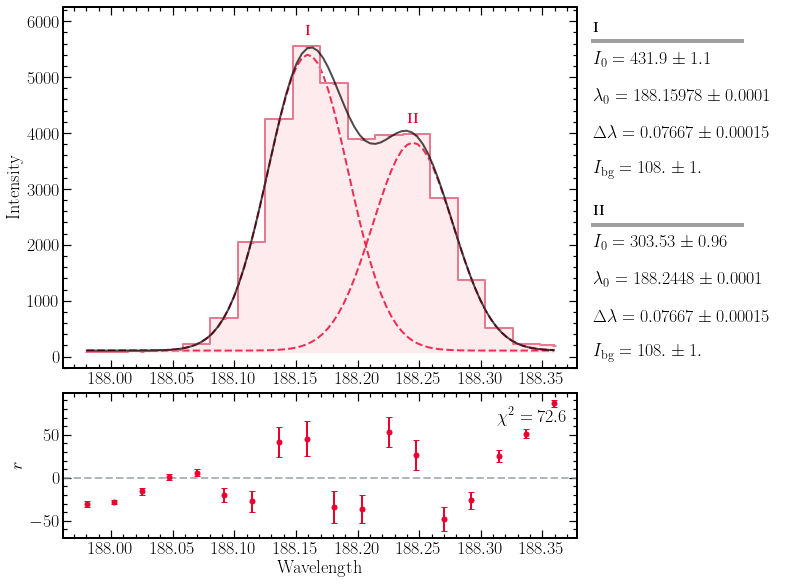

In [121]:
FeXI_188_slice = slice(972,990)
FeXI_188_model = SpectrumFitSingle(data=eis_img_aver[FeXI_188_slice],wvl=wvl[FeXI_188_slice],
                                err=eis_err_aver[FeXI_188_slice],line_number=2,
                                    line_wvl_init=[188.16,188.21],int_max_init=[1000,1000],
                                    fwhm_init=[0.07],same_width=True)
FeXI_188_model.run_lse()
FeXI_188_model.plot()

<AxesSubplot:ylabel='Intensity'>

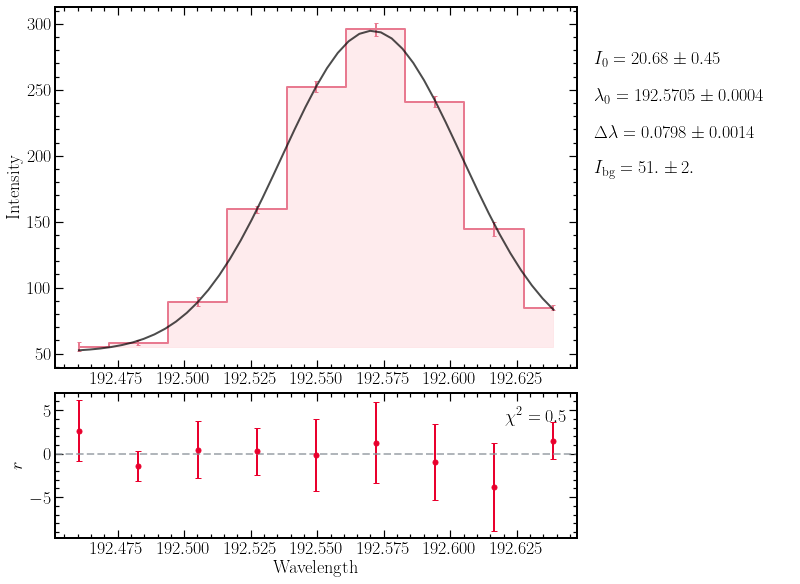

In [122]:
FeXI_192_single_slice = slice(1173,1182)
FeXI_192_single_model = SpectrumFitSingle(data=eis_img_aver[FeXI_192_single_slice],wvl=wvl[FeXI_192_single_slice],
                                err=eis_err_aver[FeXI_192_single_slice],line_number=1,
                                    line_wvl_init=[192.6,],int_max_init=[300],
                                    fwhm_init=[0.07],same_width=False)
FeXI_192_single_model.run_lse()
FeXI_192_single_model.plot()

<AxesSubplot:ylabel='Intensity'>

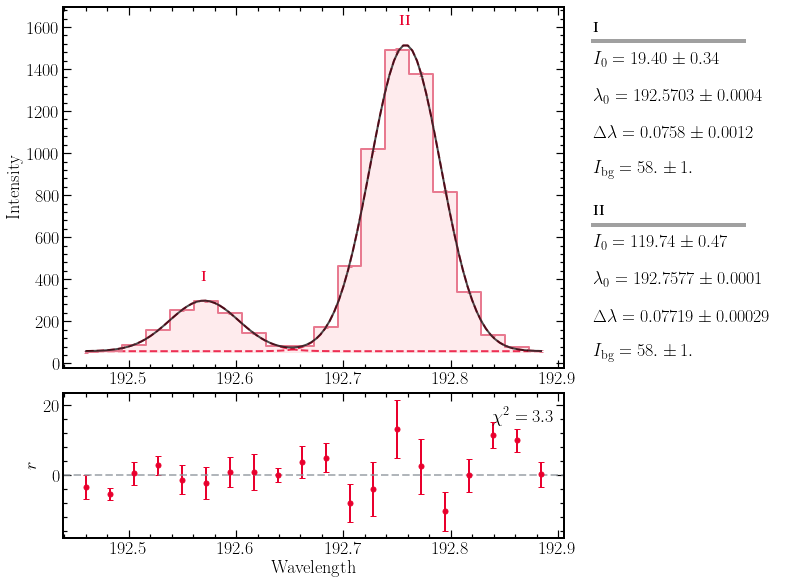

In [123]:
FeXI_192_slice = slice(1173,1193)
FeXI_192_model = SpectrumFitSingle(data=eis_img_aver[FeXI_192_slice],wvl=wvl[FeXI_192_slice],
                                err=eis_err_aver[FeXI_192_slice],line_number=2,
                                    line_wvl_init=[192.6,192.7],int_max_init=[300,1000],
                                    fwhm_init=[0.07,0.07],same_width=False)
FeXI_192_model.run_lse()
FeXI_192_model.plot()

<AxesSubplot:ylabel='Intensity'>

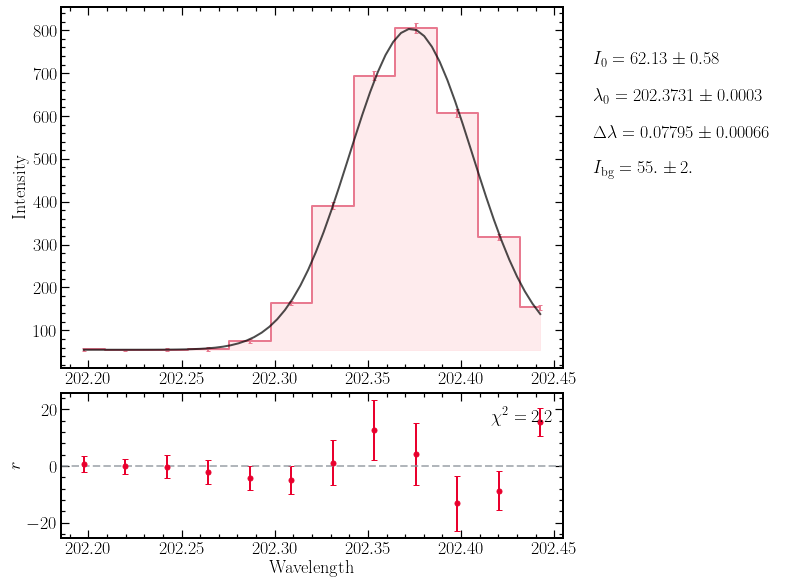

In [124]:
FeXI_202_slice = slice(1610,1622)
FeXI_202_model = SpectrumFitSingle(data=eis_img_aver[FeXI_202_slice],wvl=wvl[FeXI_202_slice],
                                err=eis_err_aver[FeXI_202_slice],line_number=1,
                                    line_wvl_init=[202.35],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
# FeXI_202_model.plot(plot_fit=False)
FeXI_202_model.run_lse()
FeXI_202_model.plot()

<AxesSubplot:ylabel='Intensity'>

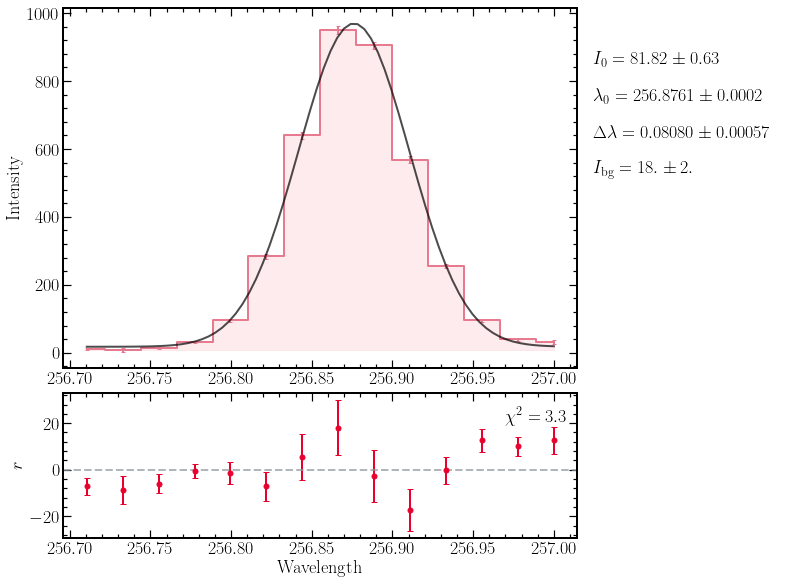

In [125]:
FeXI_256_slice = slice(2538,2552)
FeXI_256_model = SpectrumFitSingle(data=eis_img_aver[FeXI_256_slice],wvl=wvl[FeXI_256_slice],
                                err=eis_err_aver[FeXI_256_slice],line_number=1,
                                    line_wvl_init=[256.89],int_max_init=[1100],
                                    fwhm_init=[0.07],same_width=True)
FeXI_256_model.run_lse()
FeXI_256_model.plot()

<AxesSubplot:ylabel='Intensity'>

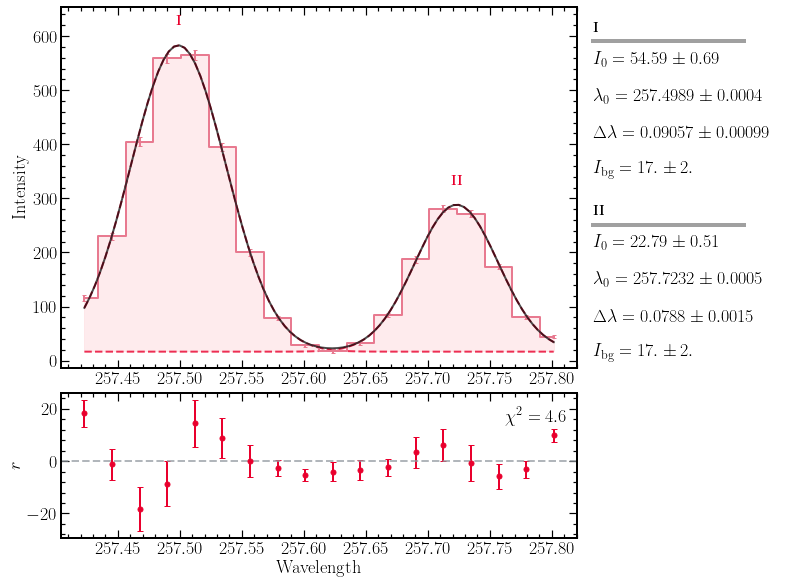

In [126]:
FeXI_257_slice = slice(2570,2588)
FeXI_257_model = SpectrumFitSingle(data=eis_img_aver[FeXI_257_slice],wvl=wvl[FeXI_257_slice],
                                err=eis_err_aver[FeXI_257_slice],line_number=2,
                                    line_wvl_init=[257.5,257.72],int_max_init=[600,3000],
                                    fwhm_init=[0.07,0.07],same_width=False)
# FeXI_257_model.plot(plot_fit=False)
FeXI_257_model.run_lse()
FeXI_257_model.plot()

<AxesSubplot:ylabel='Intensity'>

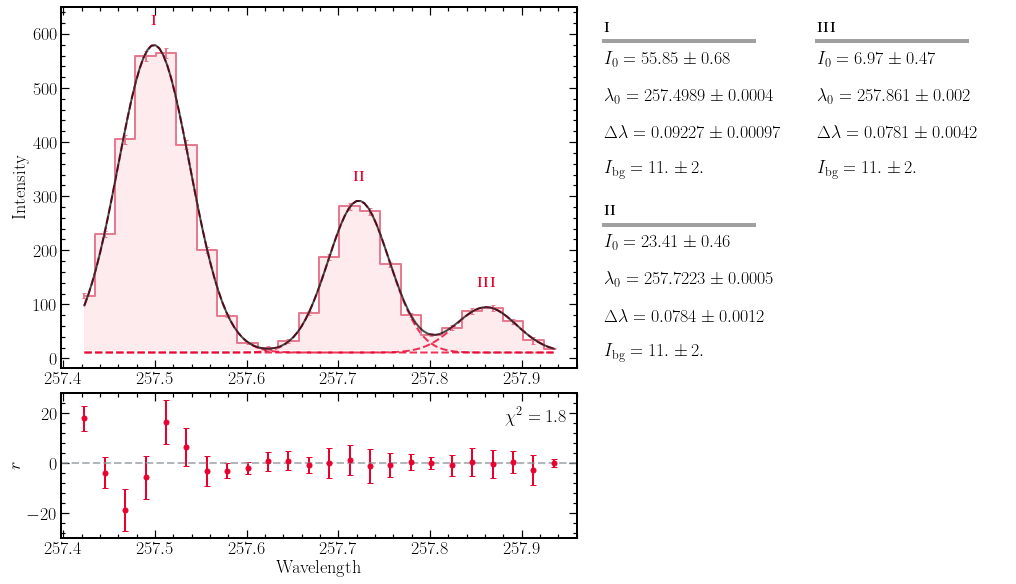

In [127]:
FeXI_257_3_slice = slice(2570,2594)
FeXI_257_3_model = SpectrumFitSingle(data=eis_img_aver[FeXI_257_3_slice],wvl=wvl[FeXI_257_3_slice],
                                err=eis_err_aver[FeXI_257_3_slice],line_number=3,
                                    line_wvl_init=[257.5,257.72,257.86],int_max_init=[600,300,100],
                                    fwhm_init=[0.07,0.07,0.07],same_width=False)
# FeXI_257_3_model.plot(plot_fit=False)
FeXI_257_3_model.run_lse()
FeXI_257_3_model.plot()

In [187]:
FeXI_line_set_wvl = np.array([181.130,182.167,188.216,
                            192.627,192.813,202.424,
                            256.919,257.772])
FeXI_line_set_fwhm = np.array([FeXI_181_model.fwhm_fit, FeXI_182_model.fwhm_fit[0],FeXI_188_model.fwhm_fit,
                                *FeXI_192_model.fwhm_fit, FeXI_202_model.fwhm_fit,
                                FeXI_256_model.fwhm_fit, FeXI_257_3_model.fwhm_fit[1]])*1e3
FeXI_line_set_fwhm_err = np.array([FeXI_181_model.fwhm_err, FeXI_182_model.fwhm_err[0],FeXI_188_model.fwhm_err,
                                *FeXI_192_model.fwhm_err, FeXI_202_model.fwhm_err,
                                FeXI_256_model.fwhm_err, FeXI_257_3_model.fwhm_err[1]])*1e3


In [129]:
def func_lamb_dlamb(x, a, b):
    return np.sqrt(b**2 + a*x**2)

Text(0.5, 1.0, 'Fe \\textsc{xi} $\\Delta_{\\rm EIS, inst}=71.9\\pm1.2\\,$\\si{\\angstrom}')

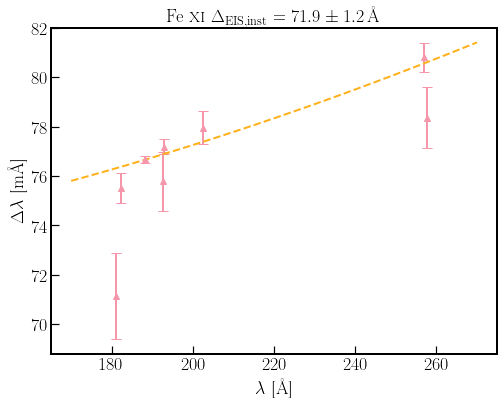

In [196]:
fig ,ax = plt.subplots(figsize=(8,6))
ax.errorbar(FeXI_line_set_wvl,FeXI_line_set_fwhm,FeXI_line_set_fwhm_err,ls="none",lw=2,marker="^",capsize=5,color="#F596AA")
popt_FeXI, pcov_FeXI = curve_fit(func_lamb_dlamb, xdata=FeXI_line_set_wvl, ydata=FeXI_line_set_fwhm,
                    p0 = [1e-5,60],sigma = FeXI_line_set_fwhm_err)
perr_FeXI = np.sqrt(np.diag(pcov_FeXI))
wvl_plot = np.linspace(170,270,101)
ax.plot(wvl_plot, func_lamb_dlamb(wvl_plot, *popt_FeXI),color="#FFB11B",lw=2,ls="--")
# poly_param = np.polyfit(FeXI_line_set_wvl[2:8],FeXI_line_set_fwhm[2:8],deg=1,w=1./FeXI_line_set_fwhm_err[2:8]) 
# poly_func = np.poly1d(poly_param)
# poly_plot = poly_func(wvl_plot)
# ax.plot(wvl_plot,poly_plot,color="#FFB11B",lw=2,ls="--")
ax.tick_params(labelsize=18)
ax.set_xlabel (r"$\lambda$ [\mbox{\AA}]",fontsize=18)
ax.set_ylabel("$\Delta \lambda$ [\mbox{m\AA}]",fontsize=18)
ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")
#print(poly_func(0))
ax.set_title(r"Fe \textsc{{xi}} $\Delta_{{\rm EIS, inst}}={:.1f}\pm{:.1f}\,$\si{{\angstrom}}".format(popt_FeXI[1],perr_FeXI[1]),fontsize=18)

<AxesSubplot:ylabel='Intensity'>

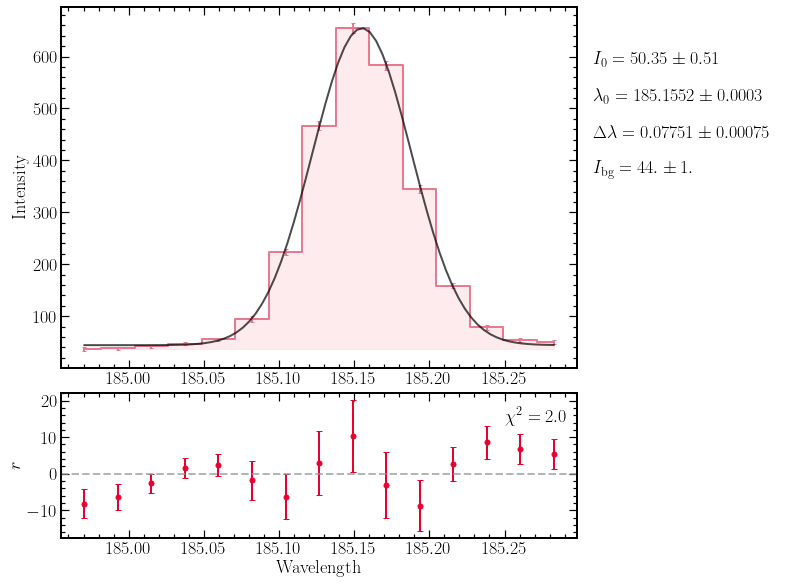

In [133]:
FeVIII_185_slice = slice(837,852)
FeVIII_185_model = SpectrumFitSingle(data=eis_img_aver[FeVIII_185_slice],wvl=wvl[FeVIII_185_slice],
                                err=eis_err_aver[FeVIII_185_slice],line_number=1,
                                    line_wvl_init=[185.15],int_max_init=[600],
                                    fwhm_init=[0.07],same_width=False)
# FeVIII_185_model.plot(plot_fit=False)
FeVIII_185_model.run_lse()
FeVIII_185_model.plot()

<AxesSubplot:ylabel='Intensity'>

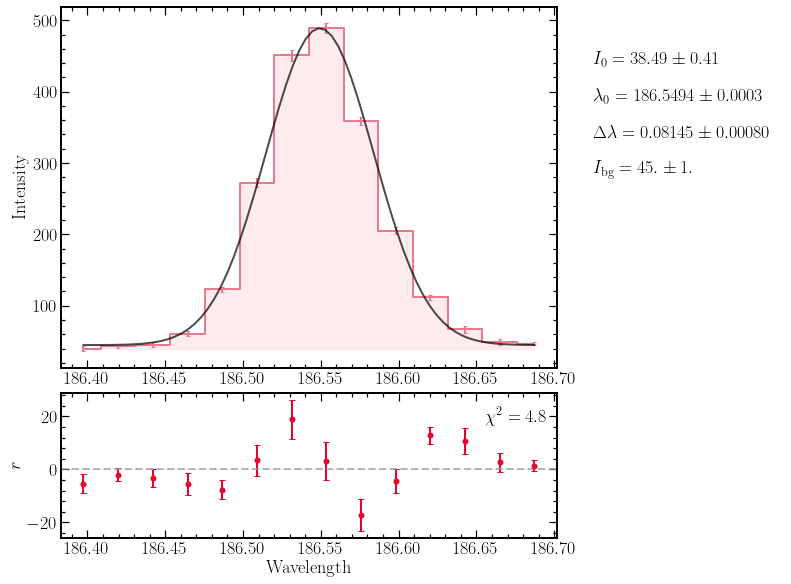

In [135]:
FeVIII_186_slice = slice(901,915)
FeVIII_186_model = SpectrumFitSingle(data=eis_img_aver[FeVIII_186_slice],wvl=wvl[FeVIII_186_slice],
                                err=eis_err_aver[FeVIII_186_slice],line_number=1,
                                    line_wvl_init=[186.55],int_max_init=[600],
                                    fwhm_init=[0.07],same_width=False)
# FeVIII_186_model.plot(plot_fit=False)
FeVIII_186_model.run_lse()
FeVIII_186_model.plot()

<AxesSubplot:ylabel='Intensity'>

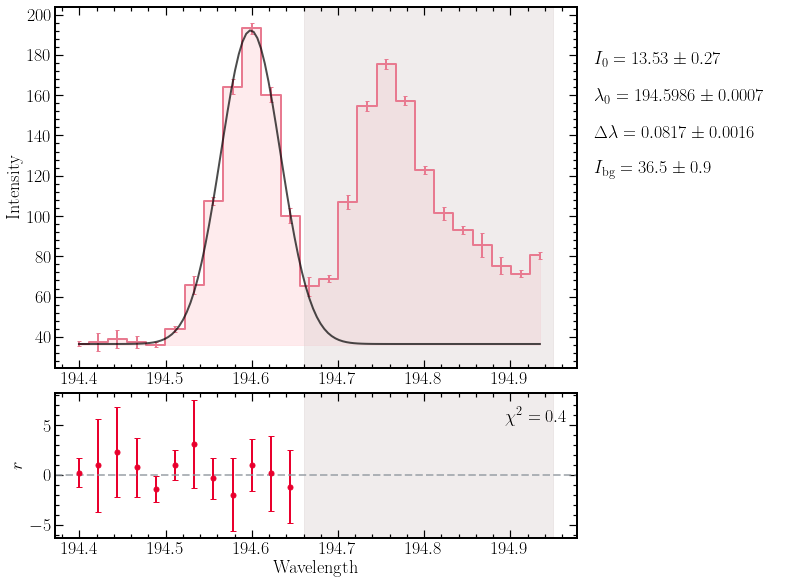

In [151]:
FeVIII_194_slice = slice(1260,1285)
FeVIII_194_model = SpectrumFitSingle(data=eis_img_aver[FeVIII_194_slice],wvl=wvl[FeVIII_194_slice],
                                err=eis_err_aver[FeVIII_194_slice],line_number=1,
                                    line_wvl_init=[194.6],int_max_init=[180],mask=[[194.66,194.95]],
                                    fwhm_init=[0.07],same_width=True)
# FeVIII_194_model.plot(plot_fit=False)
FeVIII_194_model.run_lse()
FeVIII_194_model.plot()

<AxesSubplot:ylabel='Intensity'>

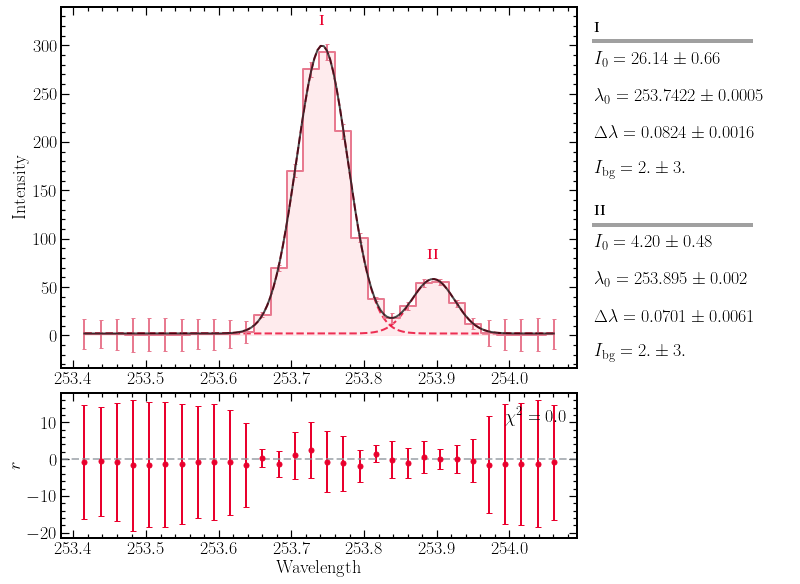

In [160]:
FeVIII_253_slice = slice(2390,2420)
FeVIII_253_model = SpectrumFitSingle(data=eis_img_aver[FeVIII_253_slice],wvl=wvl[FeVIII_253_slice],
                                err=eis_err_aver[FeVIII_253_slice],line_number=2,
                                    line_wvl_init=[253.75,253.9],int_max_init=[300,50],
                                    fwhm_init=[0.07,0.07],same_width=False)
# FeVIII_253_model.plot(plot_fit=False)
FeVIII_253_model.run_lse()
FeVIII_253_model.plot()

<AxesSubplot:ylabel='Intensity'>

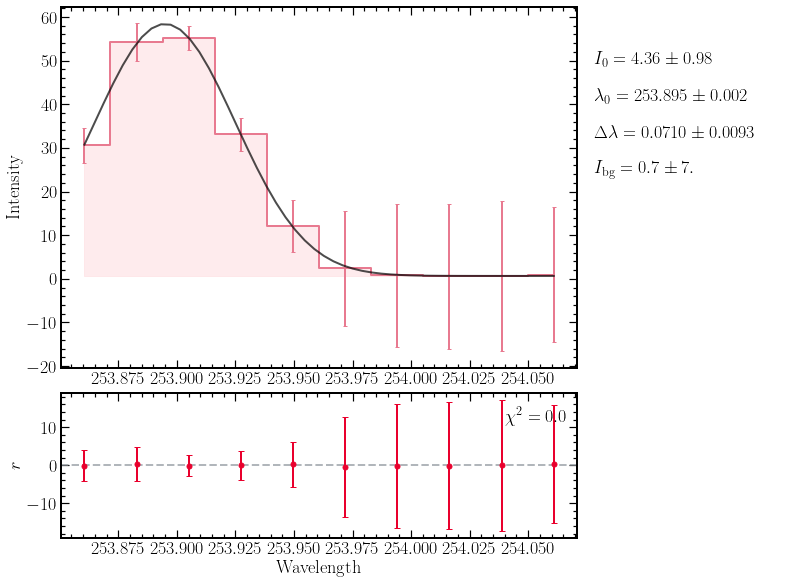

In [163]:
FeVIII_253_single_slice = slice(2410,2420)
FeVIII_253_single_model = SpectrumFitSingle(data=eis_img_aver[FeVIII_253_single_slice],wvl=wvl[FeVIII_253_single_slice],
                                err=eis_err_aver[FeVIII_253_single_slice],line_number=1,
                                    line_wvl_init=[253.9],int_max_init=[50],
                                    fwhm_init=[0.07],same_width=False)
# FeVIII_253_single_model.plot(plot_fit=False)
FeVIII_253_single_model.run_lse()
FeVIII_253_single_model.plot()

<AxesSubplot:ylabel='Intensity'>

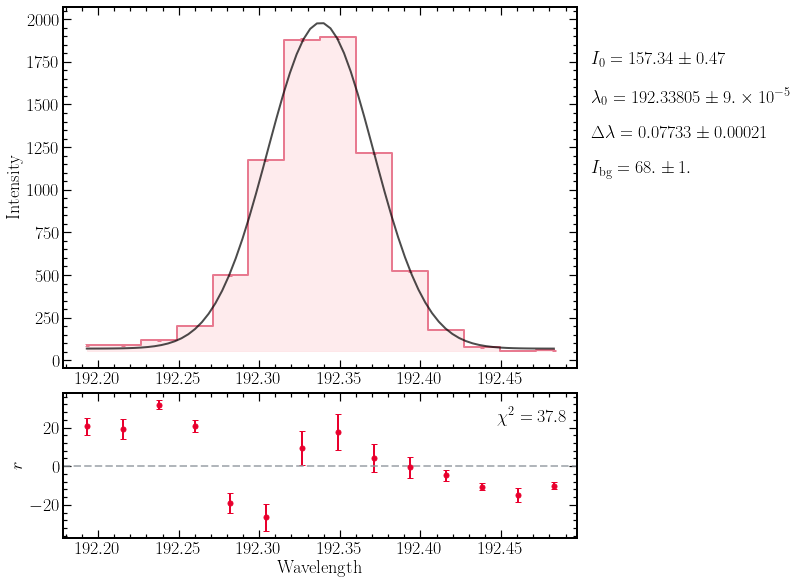

In [189]:
FeXII_192_slice = slice(1161,1175)
FeXII_192_model = SpectrumFitSingle(data=eis_img_aver[FeXII_192_slice],wvl=wvl[FeXII_192_slice],
                                err=eis_err_aver[FeXII_192_slice],line_number=1,
                                    line_wvl_init=[192.35],int_max_init=[2500],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_192_model.plot(plot_fit=False)
FeXII_192_model.run_lse()
FeXII_192_model.plot()

<AxesSubplot:ylabel='Intensity'>

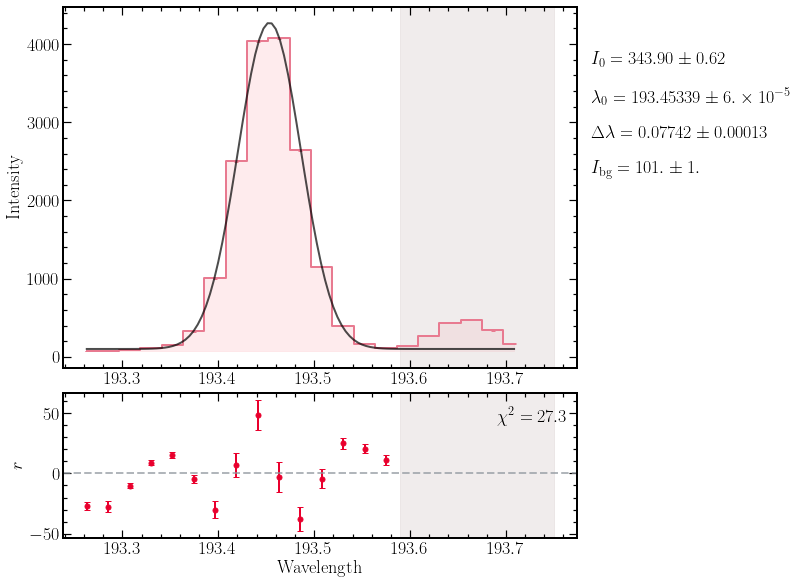

In [190]:
FeXII_193_slice = slice(1209,1230)
FeXII_193_model = SpectrumFitSingle(data=eis_img_aver[FeXII_193_slice],wvl=wvl[FeXII_193_slice],
                                err=eis_err_aver[FeXII_193_slice],line_number=1,
                                    line_wvl_init=[193.45],int_max_init=[5000],mask=[[193.59,193.75]],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_193_model.plot(plot_fit=False)
FeXII_193_model.run_lse()
FeXII_193_model.plot()

<AxesSubplot:ylabel='Intensity'>

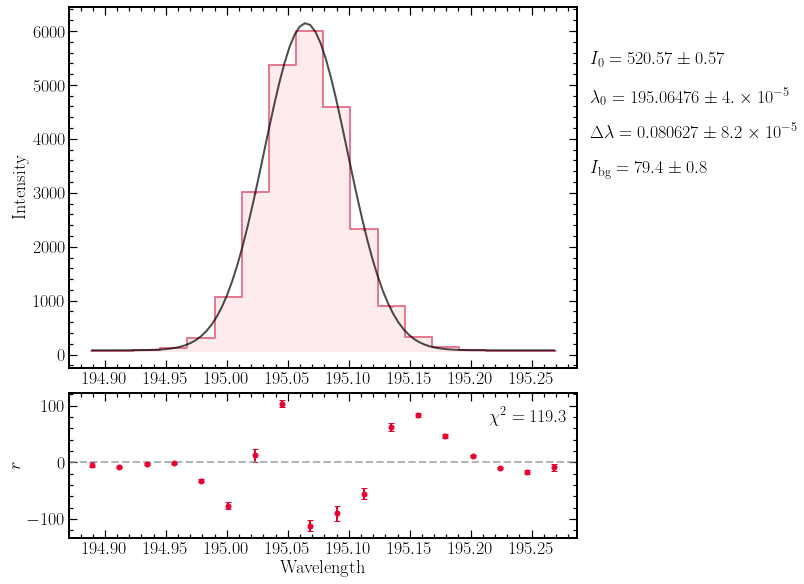

In [191]:
FeXII_195_slice = slice(1282,1300)
FeXII_195_model = SpectrumFitSingle(data=eis_img_aver[FeXII_195_slice],wvl=wvl[FeXII_195_slice],
                                err=eis_err_aver[FeXII_195_slice],line_number=1,
                                    line_wvl_init=[195.05],int_max_init=[6000],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_195_model.plot(plot_fit=False)
FeXII_195_model.run_lse()
FeXII_195_model.plot()

<AxesSubplot:ylabel='Intensity'>

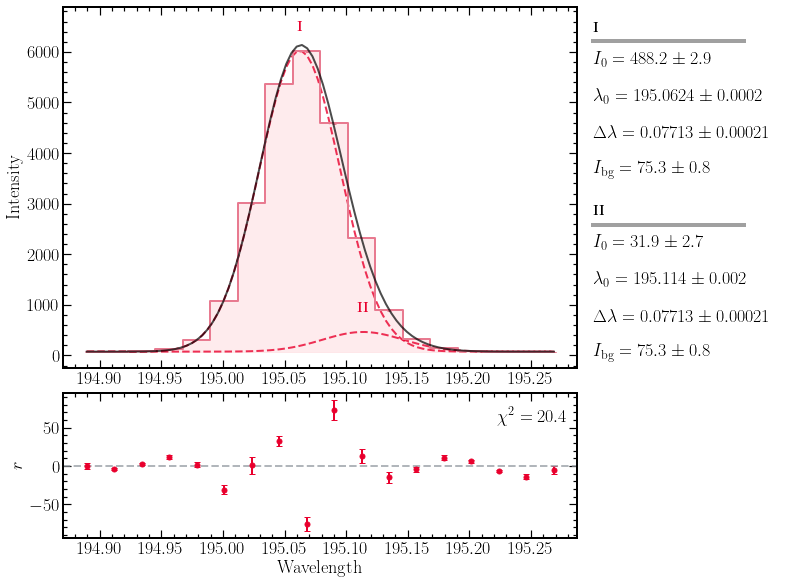

In [172]:
FeXII_195_slice = slice(1282,1300)
FeXII_195_double_model = SpectrumFitSingle(data=eis_img_aver[FeXII_195_slice],wvl=wvl[FeXII_195_slice],
                                err=eis_err_aver[FeXII_195_slice],line_number=2,
                                    line_wvl_init=[195.05,195.15],int_max_init=[6000,500],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_195_model.plot(plot_fit=False)
FeXII_195_double_model.run_lse()
FeXII_195_double_model.plot()

<AxesSubplot:ylabel='Intensity'>

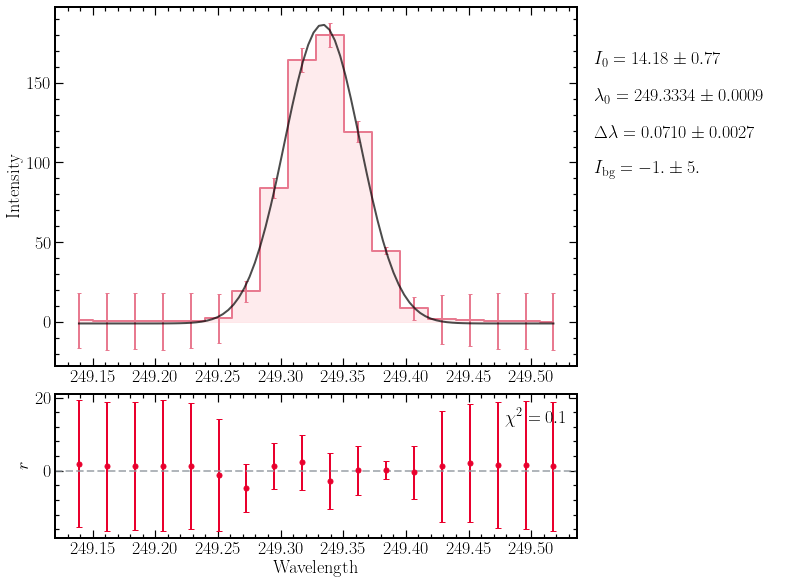

In [192]:
FeXII_249_slice = slice(2198,2216)
FeXII_249_model = SpectrumFitSingle(data=eis_img_aver[FeXII_249_slice],wvl=wvl[FeXII_249_slice],
                                err=eis_err_aver[FeXII_249_slice],line_number=1,
                                    line_wvl_init=[249.35],int_max_init=[250],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_249_model.plot(plot_fit=False)
FeXII_249_model.run_lse()
FeXII_249_model.plot()

<AxesSubplot:ylabel='Intensity'>

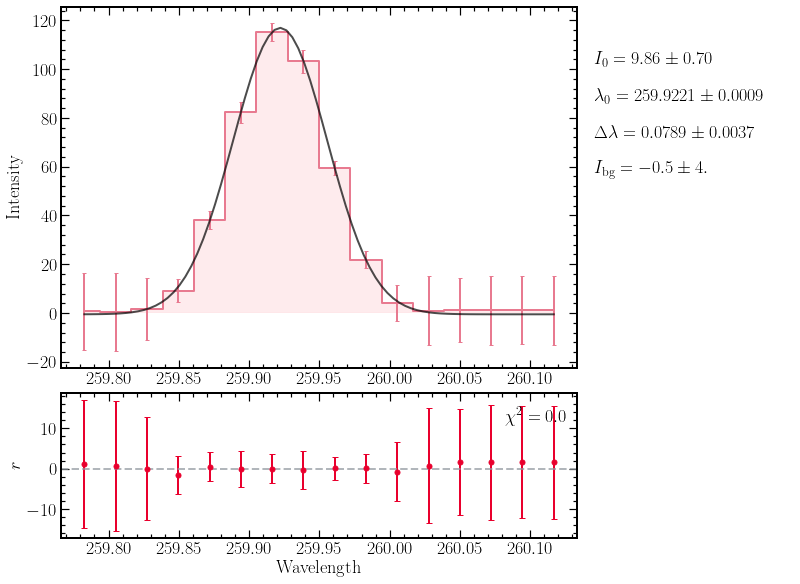

In [193]:
FeXII_259_slice = slice(2676,2692)
FeXII_259_model = SpectrumFitSingle(data=eis_img_aver[FeXII_259_slice],wvl=wvl[FeXII_259_slice],
                                err=eis_err_aver[FeXII_259_slice],line_number=1,
                                    line_wvl_init=[259.9],int_max_init=[1000],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_259_model.plot(plot_fit=False)
FeXII_259_model.run_lse()
FeXII_259_model.plot()

<AxesSubplot:ylabel='Intensity'>

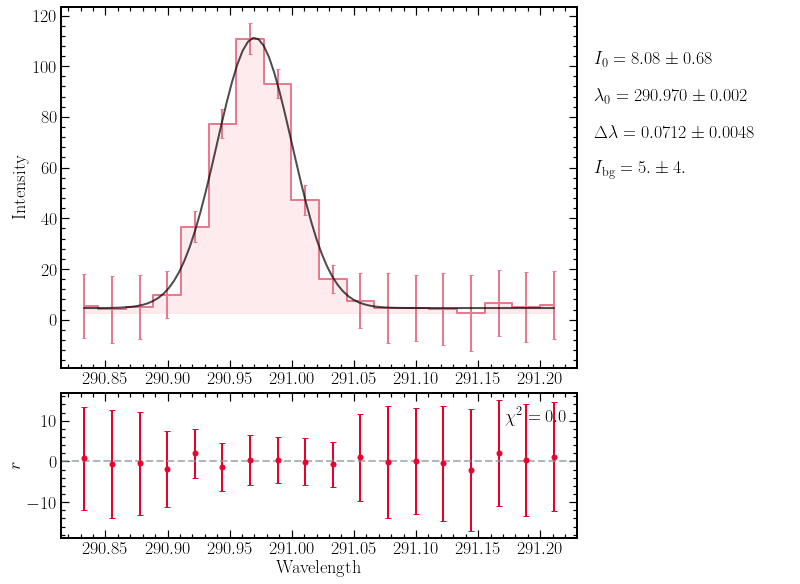

In [194]:
FeXII_291_slice = slice(4072,4090)
FeXII_291_model = SpectrumFitSingle(data=eis_img_aver[FeXII_291_slice],wvl=wvl[FeXII_291_slice],
                                err=eis_err_aver[FeXII_291_slice],line_number=1,
                                    line_wvl_init=[291.0],int_max_init=[100],
                                    fwhm_init=[0.07],same_width=True)
# FeXII_291_model.plot(plot_fit=False)
FeXII_291_model.run_lse()
FeXII_291_model.plot()

In [195]:
FeXII_line_set_wvl = np.array([192.394,193.509,195.119,
                                249.388,259.973,291.010])
FeXII_line_set_fwhm = np.array([FeXII_192_model.fwhm_fit, FeXII_193_model.fwhm_fit, FeXII_195_double_model.fwhm_fit,
                                FeXII_249_model.fwhm_fit, FeXII_259_model.fwhm_fit, FeXII_291_model.fwhm_fit])*1e3
FeXII_line_set_fwhm_err = np.array([FeXII_192_model.fwhm_err, FeXII_193_model.fwhm_err, FeXII_195_double_model.fwhm_err,
                                FeXII_249_model.fwhm_err, FeXII_259_model.fwhm_err, FeXII_291_model.fwhm_err])*1e3


Text(0.5, 1.0, 'Fe \\textsc{{xii}}')

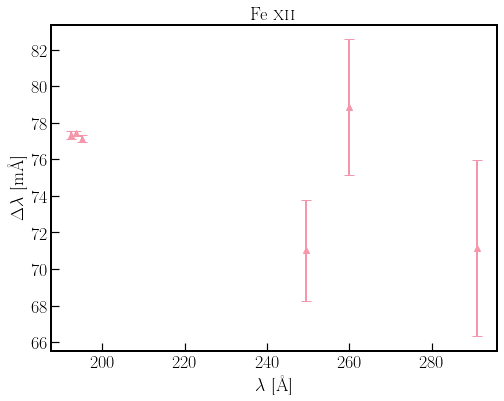

In [199]:
fig ,ax = plt.subplots(figsize=(8,6))
ax.errorbar(FeXII_line_set_wvl,FeXII_line_set_fwhm,FeXII_line_set_fwhm_err,ls="none",lw=2,marker="^",capsize=5,color="#F596AA")
popt_FeXII, pcov_FeXII = curve_fit(func_lamb_dlamb, xdata=FeXII_line_set_wvl, ydata=FeXII_line_set_fwhm,
                    p0 = [1e-5,60],sigma = FeXII_line_set_fwhm_err)
perr_FeXII = np.sqrt(np.diag(pcov_FeXII))
wvl_plot = np.linspace(170,270,101)
#ax.plot(wvl_plot, func_lamb_dlamb(wvl_plot, *popt_FeXII),color="#FFB11B",lw=2,ls="--")
# poly_param = np.polyfit(FeXI_line_set_wvl[2:8],FeXI_line_set_fwhm[2:8],deg=1,w=1./FeXI_line_set_fwhm_err[2:8]) 
# poly_func = np.poly1d(poly_param)
# poly_plot = poly_func(wvl_plot)
# ax.plot(wvl_plot,poly_plot,color="#FFB11B",lw=2,ls="--")
ax.tick_params(labelsize=18)
ax.set_xlabel (r"$\lambda$ [\mbox{\AA}]",fontsize=18)
ax.set_ylabel("$\Delta \lambda$ [\mbox{m\AA}]",fontsize=18)
ax.tick_params(which="major",width=1.2,length=8,direction="in")
ax.tick_params(which="minor",width=1.2,length=4,direction="in")
#print(poly_func(0))
ax.set_title(r"Fe \textsc{{xii}}",fontsize=18)

<AxesSubplot:ylabel='Intensity'>

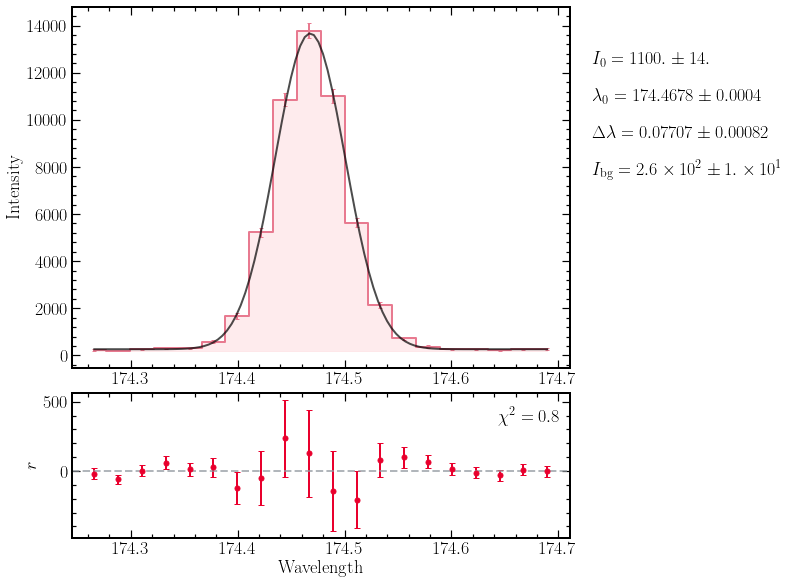

In [200]:
FeX_174_slice = slice(357,377)
FeX_174_model = SpectrumFitSingle(data=eis_img_aver[FeX_174_slice],wvl=wvl[FeX_174_slice],
                                err=eis_err_aver[FeX_174_slice],line_number=1,
                                    line_wvl_init=[174.47],int_max_init=[14000],
                                    fwhm_init=[0.07],same_width=True)
# FeX_174_model.plot(plot_fit=False)
FeX_174_model.run_lse()
FeX_174_model.plot()

<AxesSubplot:ylabel='Intensity'>

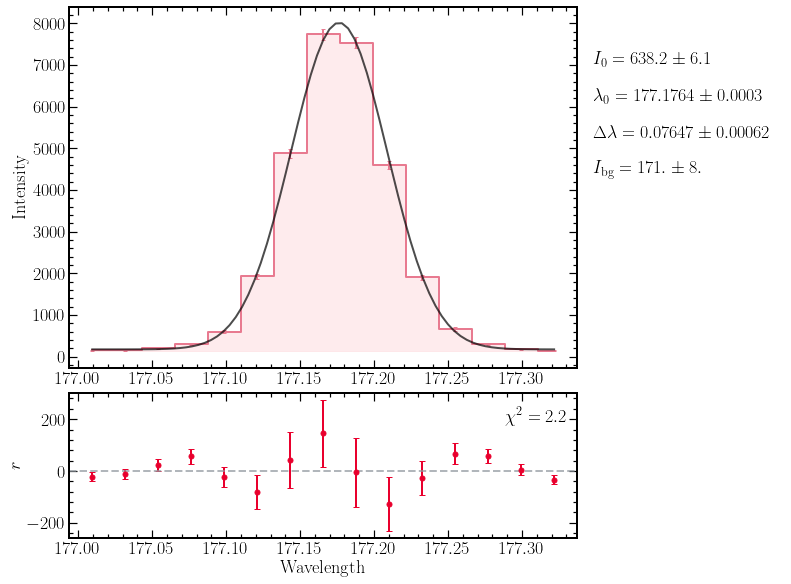

In [201]:
FeX_177_slice = slice(480,495)
FeX_177_model = SpectrumFitSingle(data=eis_img_aver[FeX_177_slice],wvl=wvl[FeX_177_slice],
                                err=eis_err_aver[FeX_177_slice],line_number=1,
                                    line_wvl_init=[177.17],int_max_init=[8000],
                                    fwhm_init=[0.07],same_width=True)
# FeX_177_model.plot(plot_fit=False)
FeX_177_model.run_lse()
FeX_177_model.plot()

<AxesSubplot:ylabel='Intensity'>

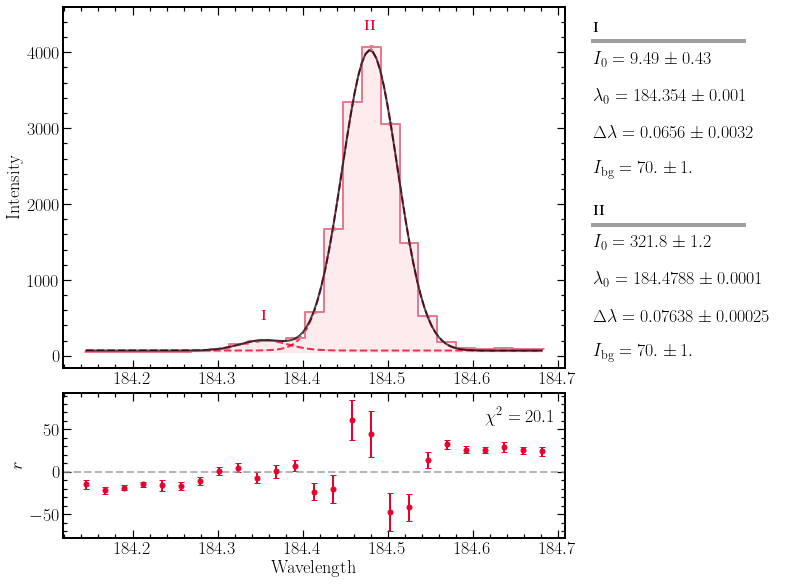

In [204]:
FeX_184_slice = slice(800,825)
FeX_184_model = SpectrumFitSingle(data=eis_img_aver[FeX_184_slice],wvl=wvl[FeX_184_slice],
                                err=eis_err_aver[FeX_184_slice],line_number=2,
                                    line_wvl_init=[184.35,184.49],int_max_init=[200,4000],
                                    fwhm_init=[0.07,0.07],same_width=False)
# FeX_184_model.plot(plot_fit=False)
FeX_184_model.run_lse()
FeX_184_model.plot()

<AxesSubplot:ylabel='Intensity'>

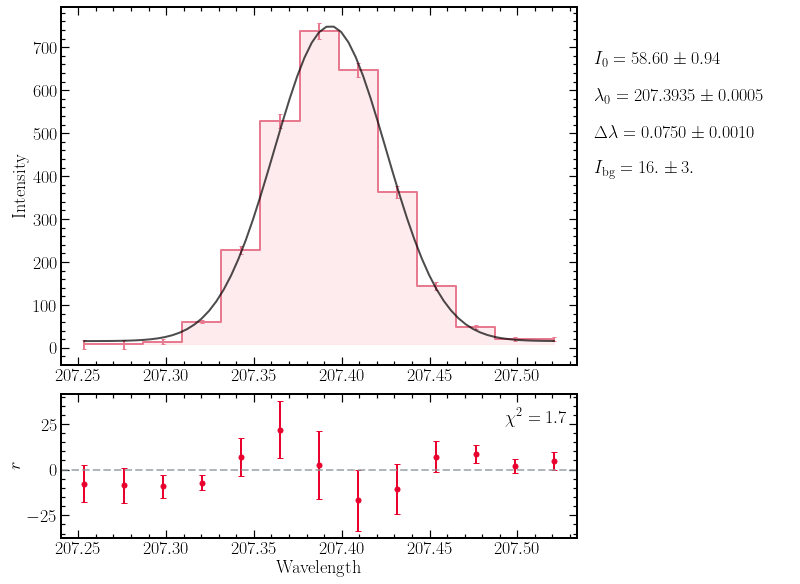

In [205]:
FeX_207_slice = slice(1837,1850)
FeX_207_model = SpectrumFitSingle(data=eis_img_aver[FeX_207_slice],wvl=wvl[FeX_207_slice],
                                err=eis_err_aver[FeX_207_slice],line_number=1,
                                    line_wvl_init=[207.4],int_max_init=[100],
                                    fwhm_init=[0.07],same_width=True)
# FeX_207_model.plot(plot_fit=False)
FeX_207_model.run_lse()
FeX_207_model.plot()

### Figure C2
<a id='figurec2'></a>

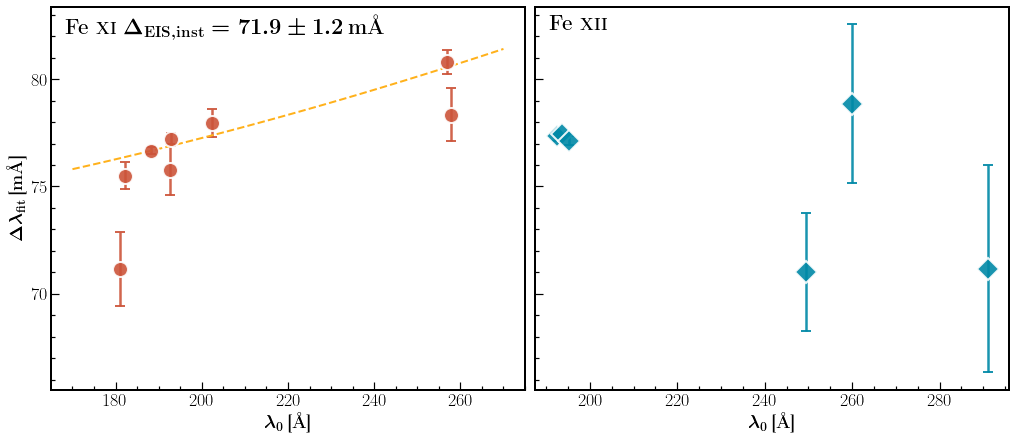

In [241]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6),constrained_layout=True,sharey=True)
ax1.errorbar(FeXI_line_set_wvl,FeXI_line_set_fwhm,FeXI_line_set_fwhm_err,ls="none",marker="o",
            markersize=15,capsize=5,lw=2.5,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5,color="#CC543A")
wvl_plot = np.linspace(170,270,101)
ax1.plot(wvl_plot, func_lamb_dlamb(wvl_plot, *popt_FeXI),color="#FFB11B",lw=2,ls="--")

ax2.errorbar(FeXII_line_set_wvl,FeXII_line_set_fwhm,FeXII_line_set_fwhm_err,color="#0089A7",ls="none",marker="D",
            markersize=15,capsize=5,lw=2.5,markeredgecolor='white',
            markeredgewidth=2,alpha=0.9,capthick=2.5)
ax1.text(0.03,0.98,r"\textbf{{Fe \textsc{{xi}}}} $\boldsymbol{{\Delta_{{\rm EIS, inst}}={:.1f}\pm{:.1f}\,}}$\textbf{{m\mbox{{\AA}}}}".format(popt_FeXI[1],perr_FeXI[1]),
        fontsize=22,ha="left",va="top",transform=ax1.transAxes)
ax2.text(0.03,0.98,r"\textbf{Fe \textsc{xii}}",fontsize=22,ha="left",va="top",
        transform=ax2.transAxes)
ax1.set_ylabel(r"$\boldsymbol{\Delta \lambda_{\rm fit}}\,$\textbf{[\mbox{m\AA}]}",fontsize=18)
ax1.set_xlabel(r"$\boldsymbol{\lambda_0}\,$\textbf{[\mbox{\AA}]}",fontsize=18)
ax2.set_xlabel(r"$\boldsymbol{\lambda_0}\,$\textbf{[\mbox{\AA}]}",fontsize=18)

ax1.yaxis.set_major_locator(ticker.FixedLocator([70,75,80]))
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())

for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=18,which="both",direction="in",width=1.2)
    ax_.tick_params(which="major",length=8)
    ax_.tick_params(which="minor",length=4)

plt.savefig(fname="../../figs/ms/dlamb_vs_lamb.pdf",format="pdf",dpi=300)

In [175]:
np.argmin(np.abs(wvl-259.97))

2684

<AxesSubplot:ylabel='Intensity'>

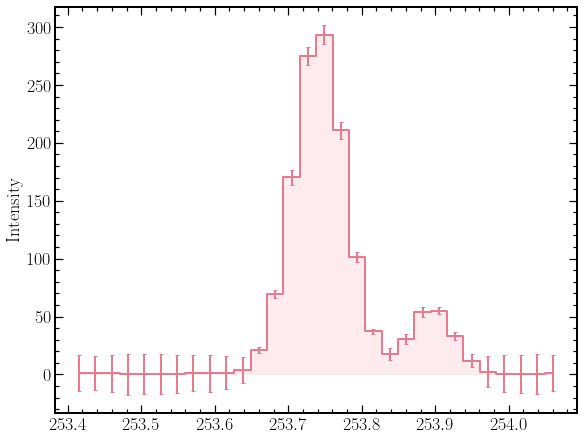

In [158]:

inspect_slice = slice(2390,2420)
inspect_model = SpectrumFitSingle(data=eis_img_aver[inspect_slice],wvl=wvl[inspect_slice],
                                err=eis_err_aver[inspect_slice],line_number=1,
                                    line_wvl_init=[194.6],int_max_init=[180],
                                    fwhm_init=[0.07],same_width=True)
inspect_model.plot(plot_fit=False)